In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## We have a dataset of 2016 Uber Drives, where we have features like where and the ride starts & stops,does our dataset contains returning or just one side ride. and type of ride either Business or Personal 

In [76]:
# Our data is store in CSV here we are calling our dataset

In [2]:
data=pd.read_csv('My Uber Drives - 2016.csv')

In [3]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [77]:
# To work on dataset some basic checks are required to gain more information regarding our data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, 0 to 1154
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   START_DATE*           1150 non-null   datetime64[ns]
 1   END_DATE*             1150 non-null   datetime64[ns]
 2   CATEGORY*             1150 non-null   object        
 3   START*                1150 non-null   object        
 4   STOP*                 1150 non-null   object        
 5   KM                    1150 non-null   float64       
 6   PURPOSE*              1150 non-null   object        
 7   Speed KM/hr           1150 non-null   float64       
 8   MONTH*                1150 non-null   object        
 9   DAY*                  1150 non-null   object        
 10  WEEK*                 1150 non-null   object        
 11  YEAR*                 1150 non-null   object        
 12  RIDE_TYPE             1150 non-null   object        
 13  Ride Completion(min)  1

In [5]:
# Our data consists of 1156 rows and with 7 columns
data.shape

(1156, 7)

In [78]:
# Checking that is there any null value in our data so we can remove it 
data.isnull().sum()

START_DATE*             0
END_DATE*               0
CATEGORY*               0
START*                  0
STOP*                   0
KM                      0
PURPOSE*                0
Speed KM/hr             0
MONTH*                  0
DAY*                    0
WEEK*                   0
YEAR*                   0
RIDE_TYPE               0
Ride Completion(min)    0
dtype: int64

In [80]:
data[data['END_DATE*'].isnull()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM,PURPOSE*,Speed KM/hr,MONTH*,DAY*,WEEK*,YEAR*,RIDE_TYPE,Ride Completion(min)


In [79]:
# Dropping the Null Value
data.drop(data.index[1155] , inplace=True)

IndexError: index 1155 is out of bounds for axis 0 with size 1150

In [81]:
# Converting our date and time feature into datetime format 
data['END_DATE*']=pd.to_datetime(data['END_DATE*'])

In [10]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'])

In [11]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [83]:
# In our Purpose features some of the values are NAN but instead of removing them we are just filling it with some name/value
data.fillna('Purpose Not Given',inplace=True)

In [85]:
# Conerting distance into KM to calculate speed in standard units
def convert_miles(miles):
    km = miles * 1.60934
    return km

In [14]:
miles = data['MILES*']
kilometer = convert_miles(miles)

In [15]:
data['MILES*']=kilometer

In [16]:
data.rename(columns={'MILES*' : 'KM'} , inplace=True)

In [86]:
# Removing the error values which makes no sense as we can see the start and stop time are same 
data[data['START_DATE*']==data['END_DATE*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM,PURPOSE*,Speed KM/hr,MONTH*,DAY*,WEEK*,YEAR*,RIDE_TYPE,Ride Completion(min)


In [18]:
data.drop(data.index[[751,761,798,807]],inplace=True)

In [19]:
time=(data['END_DATE*'] - data['START_DATE*']).dt.total_seconds()/3600
speed = data['KM']/time

In [20]:
data['speed'] = speed

In [21]:
data.rename(columns = { 'speed' : 'Speed KM/hr'} , inplace =True) 

In [22]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM,PURPOSE*,Speed KM/hr
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain,82.076340
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,8.046700,Purpose Not Given,40.233500
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies,35.653071
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,7.563898,Meeting,32.416706
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit,91.804440


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1151 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1151 non-null   datetime64[ns]
 1   END_DATE*    1151 non-null   datetime64[ns]
 2   CATEGORY*    1151 non-null   object        
 3   START*       1151 non-null   object        
 4   STOP*        1151 non-null   object        
 5   KM           1151 non-null   float64       
 6   PURPOSE*     1151 non-null   object        
 7   Speed KM/hr  1151 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 80.9+ KB


In [87]:
# dropping duplicate values in our data
data.drop_duplicates(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1150 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1150 non-null   datetime64[ns]
 1   END_DATE*    1150 non-null   datetime64[ns]
 2   CATEGORY*    1150 non-null   object        
 3   START*       1150 non-null   object        
 4   STOP*        1150 non-null   object        
 5   KM           1150 non-null   float64       
 6   PURPOSE*     1150 non-null   object        
 7   Speed KM/hr  1150 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 80.9+ KB


In [89]:
drives_in_category=data['CATEGORY*'].value_counts().to_frame().reset_index()

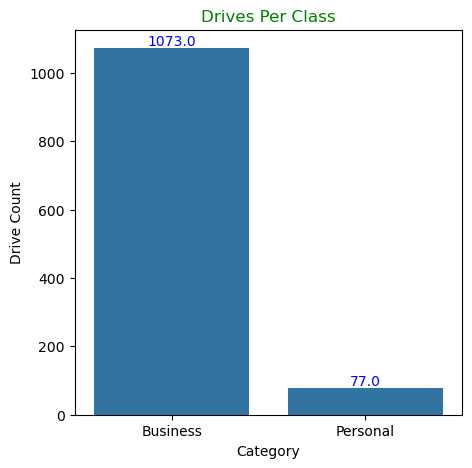

In [50]:
plt.figure(figsize=(5,5))
bars=sns.countplot(x=data['CATEGORY*'])
plt.title("Drives Per Class",color='green')
plt.xlabel('Category')
plt.ylabel('Drive Count')
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() +bar.get_width()/2 ,height , f'{height}',ha='center' , va='bottom' , fontsize=10 , color='b')  
plt.show()

## In our data we have seen that most of the Rides are for business 

In [28]:
purpose=data['PURPOSE*'].value_counts().to_frame().reset_index().drop(0)

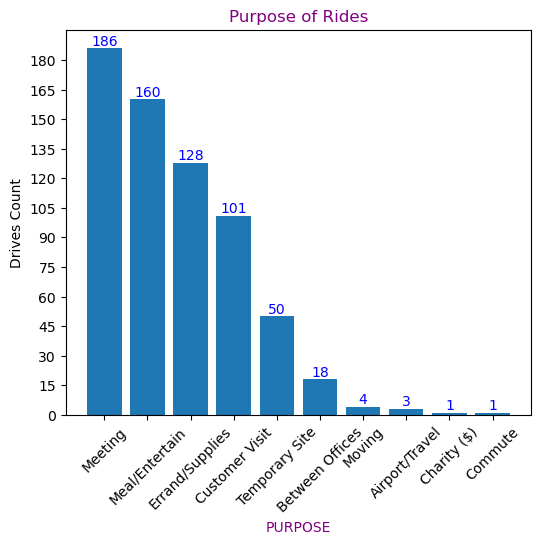

In [52]:
plt.figure(figsize=(6,5))
bars=plt.bar( purpose['PURPOSE*'],purpose['count'], data=purpose)
plt.xticks(rotation=45)
plt.yticks(range(0,191,15))
plt.xlabel("PURPOSE",color='purple')
plt.ylabel('Drives Count')
plt.title('Purpose of Rides',color='Purple')
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() +bar.get_width()/2 ,height , f'{height}',ha='center' , va='bottom' , fontsize=10 , color='b')

plt.show()

## Here are the purpose or reason that are rides booked for Most of the rides are for Meetings and Meal/Entertainment and we have less number of rides for charity and commute purpose

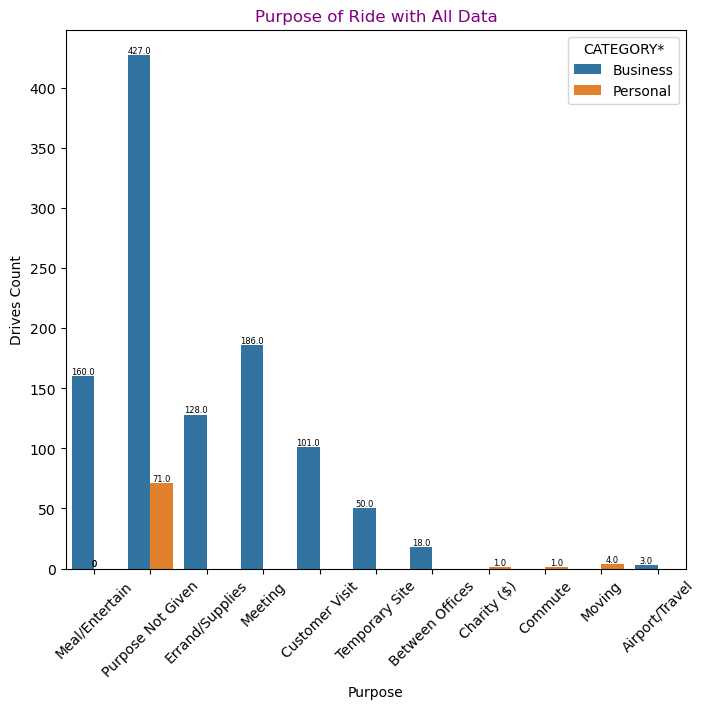

In [57]:
plt.figure(figsize=(8,7))
bars=sns.countplot(x=data['PURPOSE*'] , hue=data['CATEGORY*']  )
plt.xticks(rotation=45)
plt.title("Purpose of Ride with All Data", color="purple")
plt.xlabel('Purpose')
plt.ylabel('Drives Count')
for bar in bars.patches:    
    height = bar.get_height()
    plt.text(bar.get_x() +bar.get_width()/2 ,height , f'{height}',ha='center' , va='bottom' , fontsize=6 , color='black')

plt.show()

In [31]:
data['MONTH*']=data['START_DATE*'].dt.strftime('%b')

In [32]:
data['DAY*']=data['START_DATE*'].dt.strftime('%a')
data['WEEK*']=data['START_DATE*'].dt.strftime('%w')
data['YEAR*']=data['START_DATE*'].dt.strftime('%Y')

In [33]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,KM,PURPOSE*,Speed KM/hr,MONTH*,DAY*,WEEK*,YEAR*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,8.207634,Meal/Entertain,82.076340,Jan,Fri,5,2016
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,8.046700,Purpose Not Given,40.233500,Jan,Sat,6,2016
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,7.724832,Errand/Supplies,35.653071,Jan,Sat,6,2016
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,7.563898,Meeting,32.416706,Jan,Tue,2,2016
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,102.514958,Customer Visit,91.804440,Jan,Wed,3,2016


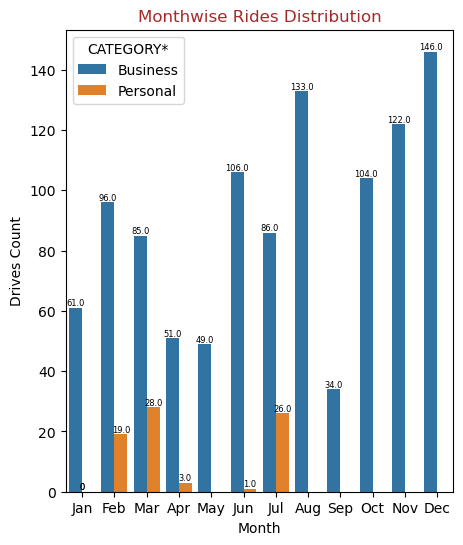

In [59]:
plt.figure(figsize=(5,6))
bars=sns.countplot(x=data['MONTH*'] , hue=data['CATEGORY*'])
plt.title("Monthwise Rides Distribution" , color='brown')
plt.xlabel('Month')
plt.ylabel('Drives Count')
for bar in bars.patches:    
    height = bar.get_height()
    plt.text(bar.get_x() +bar.get_width()/2 ,height , f'{height}',ha='center' , va='bottom' , fontsize=6 , color='black')

plt.show()

## Most of the business rides were booked in the month of december and august where less number of business rides are bookes sept and May. 
## Most of the personal rides were booked in March and july where lesser are in june and april

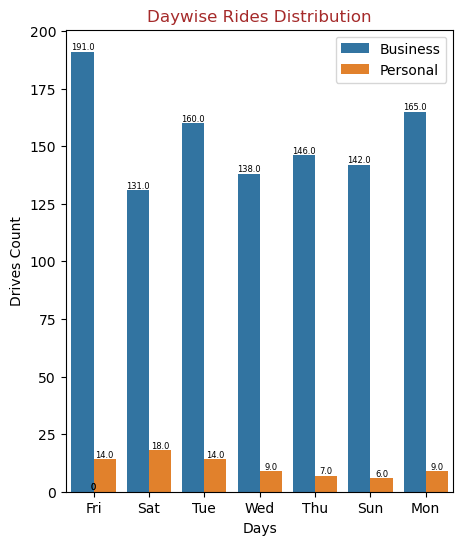

In [61]:
plt.figure(figsize=(5,6))
bars=sns.countplot(x=data['DAY*'] , hue=data['CATEGORY*'])
plt.title("Daywise Rides Distribution" , color='brown')
plt.xlabel("Days")
plt.ylabel("Drives Count")
plt.legend(loc='best')
for bar in bars.patches:    
    height = bar.get_height()
    plt.text(bar.get_x() +bar.get_width()/2 ,height , f'{height}',ha='center' , va='bottom' , fontsize=6 , color='black')

plt.show()

## Most number of business rirdes are booked on Friday and Monday where we can see that most number of personal rides are on Friday and Saturday 

In [91]:
data['WEEK*'].max()

'6'

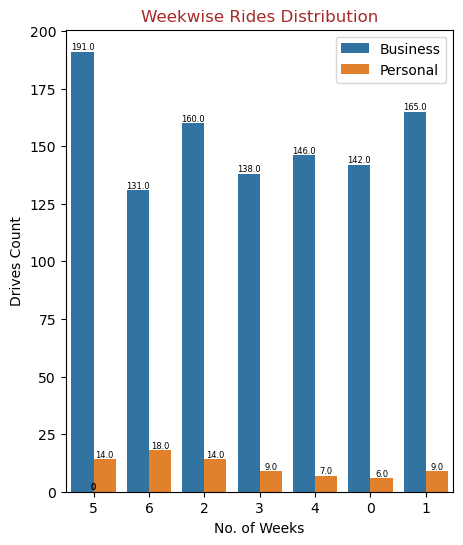

In [62]:
plt.figure(figsize=(5,6))
bars=sns.countplot(x=data['WEEK*'] , hue=data['CATEGORY*'])
plt.title("Weekwise Rides Distribution" , color='brown')
plt.xlabel("No. of Weeks")
plt.ylabel("Drives Count")
plt.legend(loc='best')
for bar in bars.patches:    
    height = bar.get_height()
    plt.text(bar.get_x() +bar.get_width()/2 ,height , f'{height}',ha='center' , va='bottom' , fontsize=6 , color='black')

plt.show()

In [93]:
# Calculating the returning and non returning rides & appending the column in our main dataset
for index, row in data.iterrows():
    if row['START*'] == row['STOP*']:
        print('Returning Rides')
    else: 
        print('Non Returning')

Returning Rides
Returning Rides
Returning Rides
Returning Rides
Non Returning
Returning Rides
Non Returning
Returning Rides
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Returning Rides
Non Returning
Non Returning
Non Returning
Non Returning
Returning Rides
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Returning Rides
Returning Rides
Returning Rides
Non Returning
Non Returning
Non Returning
Returning Rides
Returning Rides
Returning Rides
Non Returning
Non Returning
Returning Rides
Non Returning
Non Returning
Non Returning
Non Returning
Returning Rides
Returning Rides
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Non Returning
Returning Rides
Returning Rides
Non Returning
Non Return

In [38]:
def ride_type(row):
    if row['START*'] == row['STOP*']:
        return 'Returning Ride'
    else: 
        return 'Non Returning'
data['RIDE_TYPE'] = data.apply(ride_type, axis=1)

In [39]:
returning_rides=data['RIDE_TYPE'].value_counts().to_frame().reset_index()

In [40]:
Xticks = ['Returning Drives' , 'Non Returning Drives']

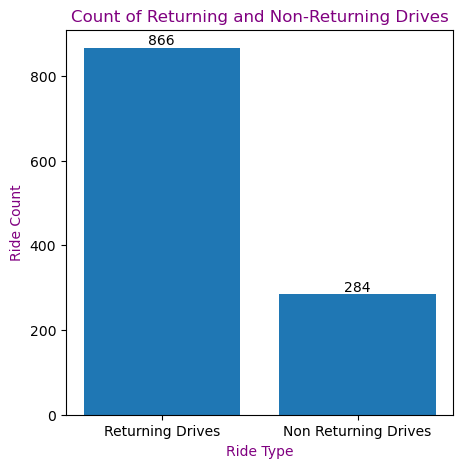

In [63]:
plt.figure(figsize=(5,5))
bars=plt.bar(returning_rides['RIDE_TYPE'] , returning_rides['count'] , data=returning_rides)
plt.xticks(ticks=range(len(Xticks)), labels=Xticks)
plt.xlabel('Ride Type', color='purple')
plt.ylabel('Ride Count' , color='purple')
plt.title('Count of Returning and Non-Returning Drives', color='purple')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom' , color='black')
plt.show()

## From above graph we can see that the number of returning customers are highier than the non returning customers 

In [43]:
time_taken=(data['END_DATE*'] - data['START_DATE*']).dt.total_seconds()/60

In [44]:
data['Ride Completion(min)']= time_taken

In [64]:
data['Ride Completion(min)'].mean()

23.322608695652175

In [74]:
data['KM'].min()

0.80467